In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score, 
                           roc_curve, precision_recall_curve, confusion_matrix)

import warnings
warnings.filterwarnings('ignore')



print("All Liberaries Loadded Successfully")

All Liberaries Loadded Successfully


## Loading and Exploring data

In [2]:
tr_df= pd.read_csv("../data/train.csv")
ts_df= pd.read_csv("../data/test.csv")


In [3]:
tr_df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
ts_df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [5]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
tr_df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [7]:
tr_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We need to handle missing values in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term','Credit_History']

In [8]:
missing_data = tr_df.isnull().sum()
missing_percent = (missing_data / len(tr_df)) * 100


missing_summary = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percent': missing_percent
    }).sort_values('Missing_Percent', ascending=False)
    
print("\nMissing Values Summary:\n")
print(missing_summary[missing_summary['Missing_Count'] > 0])
    


Missing Values Summary:

                  Missing_Count  Missing_Percent
Credit_History               50         8.143322
Self_Employed                32         5.211726
LoanAmount                   22         3.583062
Dependents                   15         2.442997
Loan_Amount_Term             14         2.280130
Gender                       13         2.117264
Married                       3         0.488599


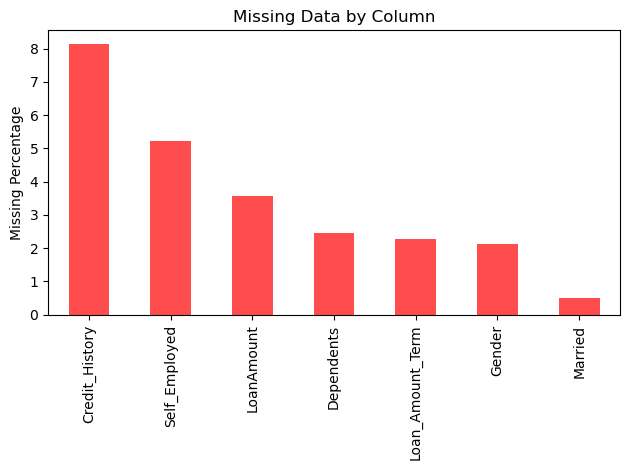

In [9]:
# Missing data visualization
if missing_summary['Missing_Count'].sum() > 0:
    missing_summary[missing_summary['Missing_Count'] > 0]['Missing_Percent'].plot(
            kind='bar',  color='red', alpha=0.7)
    plt.title('Missing Data by Column')
    plt.ylabel('Missing Percentage')
    plt.xticks( rotation=90)
    
    plt.tight_layout()
    plt.show()

### Exploring the target column

In [10]:
tr_df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

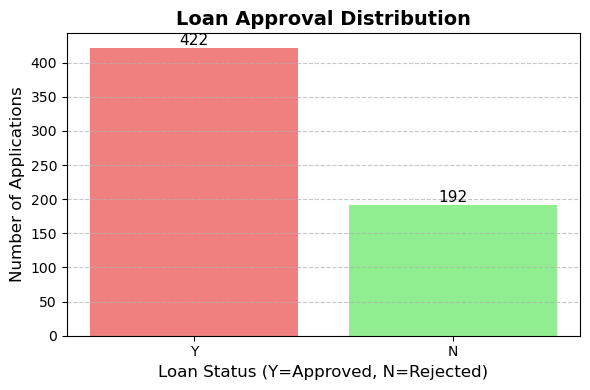

In [11]:

status_counts = tr_df['Loan_Status'].value_counts()

# Create bar plot
plt.figure(figsize=(6,4))
bars = plt.bar(status_counts.index, status_counts.values, color=['lightcoral', 'lightgreen'])

# Add labels and title
plt.title('Loan Approval Distribution', fontsize=14, weight='bold')
plt.xlabel('Loan Status (Y=Approved, N=Rejected)', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height , 
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Notes**

* My data is imbalanced (422 Y, 192 N). I must use precision, recall, F1-score — NOT accuracy

* When you train your model, use classification_report, not just accuracy_score.

this is an imbalanced dataset with about 69% approvals (Y) vs about 31% rejections (N)

## Visualization

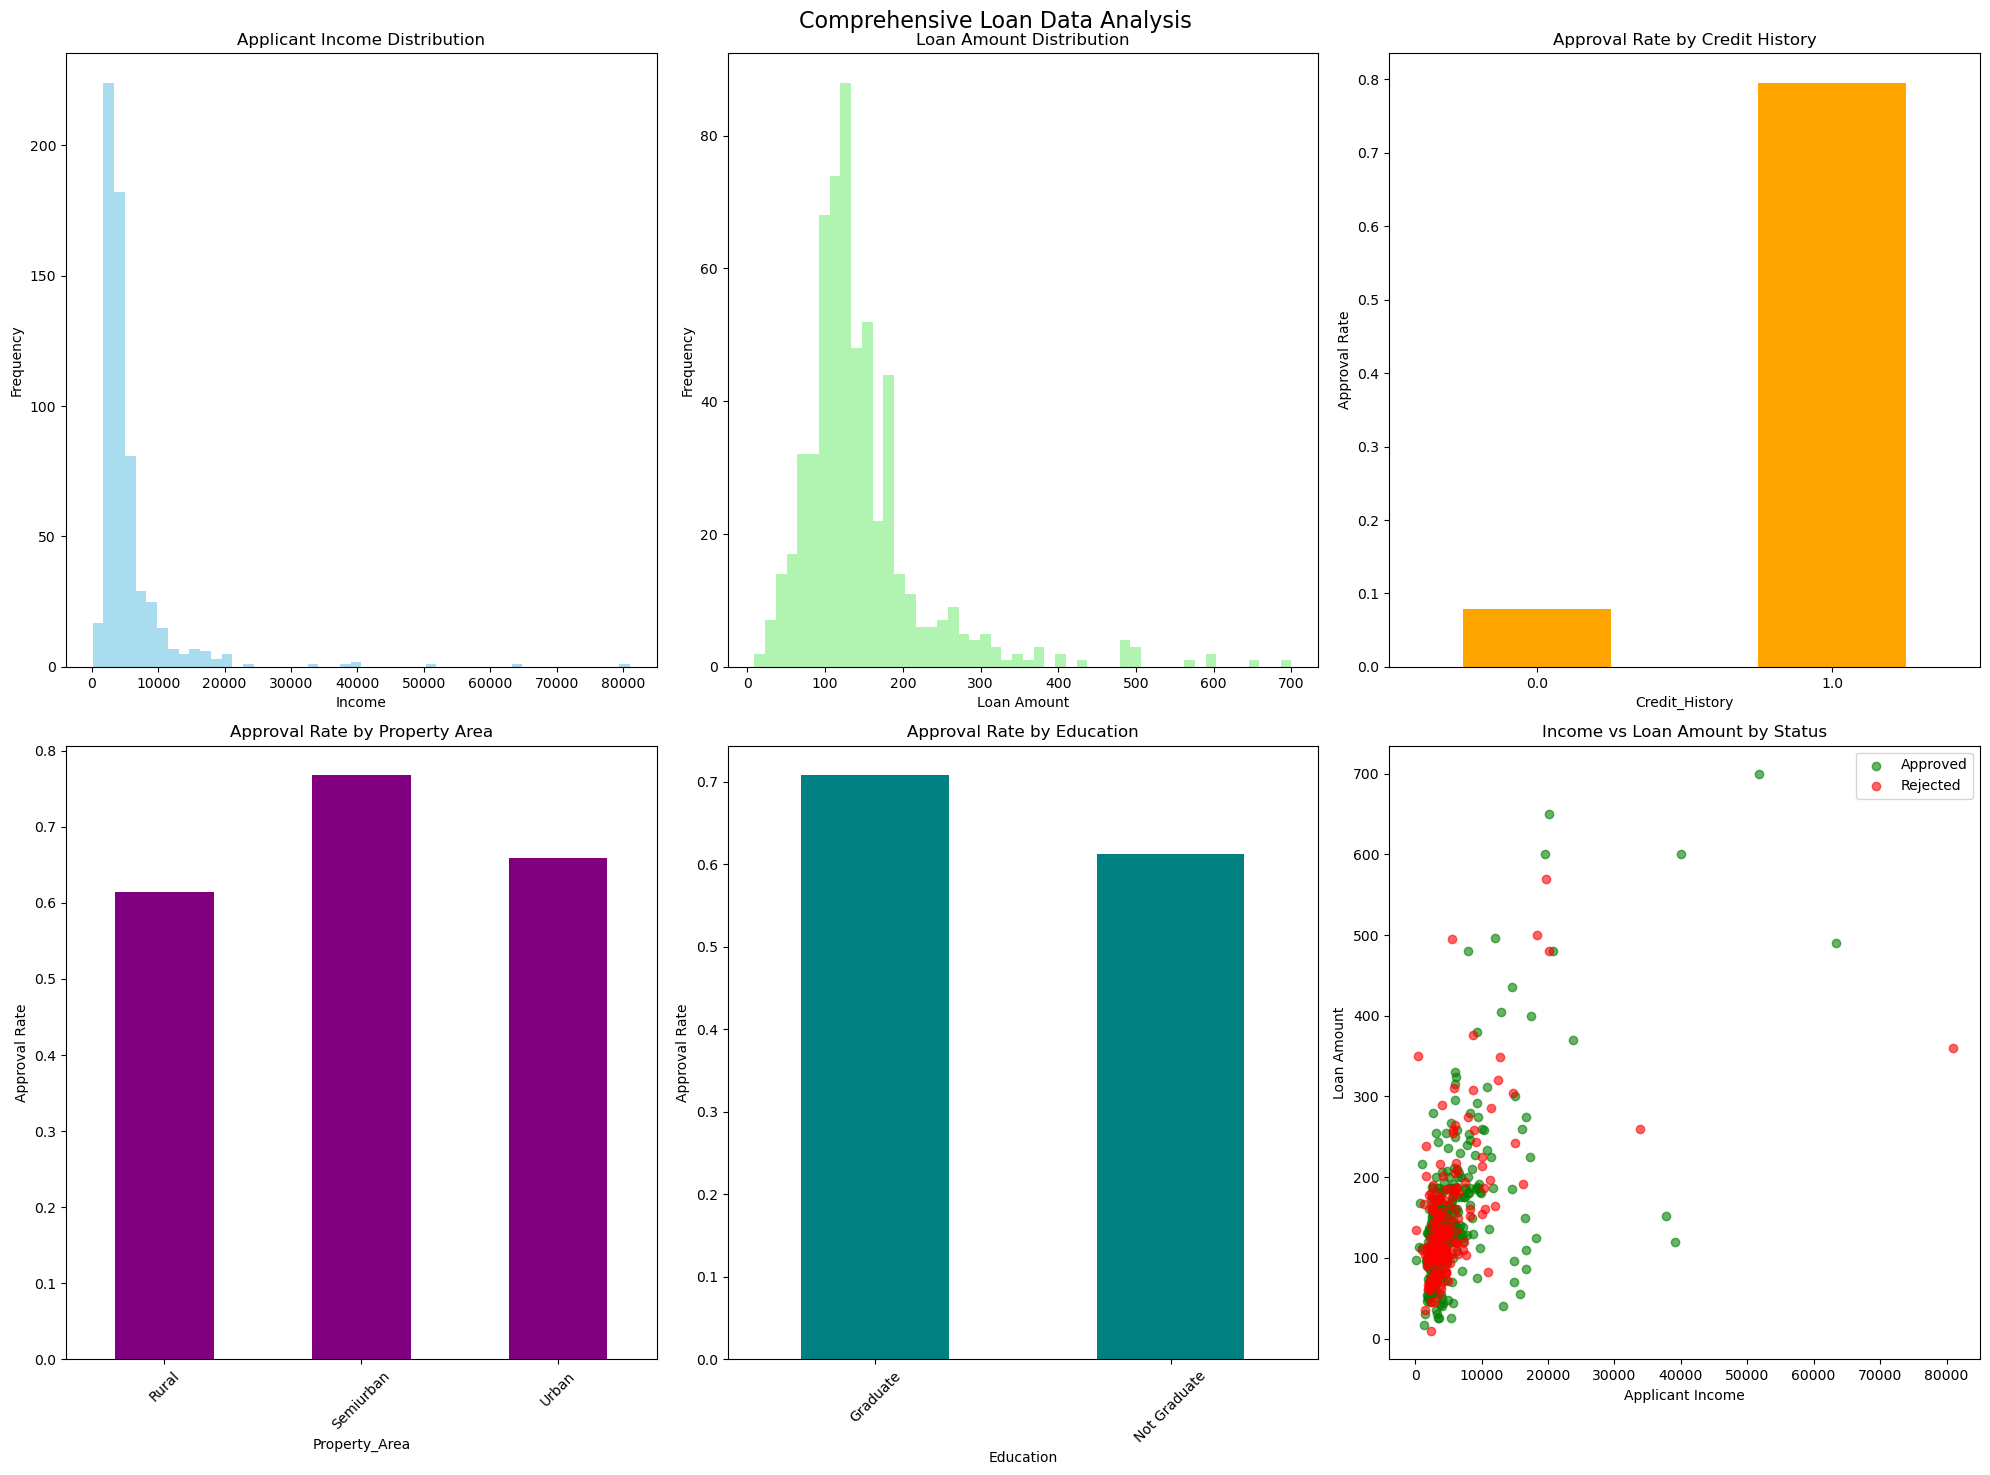

In [12]:

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Comprehensive Loan Data Analysis', fontsize=16, y=0.98)
    

    
# Income distribution
axes[0,0].hist(tr_df['ApplicantIncome'], bins = 50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Applicant Income Distribution') 
axes[0,0].set_xlabel('Income') 
axes[0,0].set_ylabel('Frequency')
    
# Loan amount distribution  
axes[0,1].hist(tr_df['LoanAmount'].dropna(), bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Loan Amount Distribution')
axes[0,1].set_xlabel('Loan Amount')
axes[0,1].set_ylabel('Frequency')
    
# Approval rate by credit history
credit_approval = tr_df.groupby('Credit_History')['Loan_Status'].apply(lambda x: (x=='Y').mean())
credit_approval.plot(kind='bar', ax=axes[0,2], color='orange')
axes[0,2].set_title('Approval Rate by Credit History')
axes[0,2].set_ylabel('Approval Rate')
axes[0,2].tick_params(axis='x', rotation=0)
    
# Approval rate by property area
area_approval = tr_df.groupby('Property_Area')['Loan_Status'].apply(lambda x: (x=='Y').mean())
area_approval.plot(kind='bar', ax=axes[1,0], color='purple')
axes[1,0].set_title('Approval Rate by Property Area')
axes[1,0].set_ylabel('Approval Rate')
axes[1,0].tick_params(axis='x', rotation=45)
    
# Approval rate by education
edu_approval = tr_df.groupby('Education')['Loan_Status'].apply(lambda x: (x=='Y').mean())
edu_approval.plot(kind='bar', ax=axes[1,1], color='teal')
axes[1,1].set_title('Approval Rate by Education')
axes[1,1].set_ylabel('Approval Rate')
axes[1,1].tick_params(axis='x', rotation=45)
    
# Income vs Loan Amount scatter
approved = tr_df[tr_df['Loan_Status'] == 'Y']
rejected = tr_df[tr_df['Loan_Status'] == 'N']
        
axes[1,2].scatter(approved['ApplicantIncome'], approved['LoanAmount'], 
                         alpha=0.6, label='Approved', color='green')
axes[1,2].scatter(rejected['ApplicantIncome'], rejected['LoanAmount'], 
                         alpha=0.6, label='Rejected', color='red')
axes[1,2].set_title('Income vs Loan Amount by Status')
axes[1,2].set_xlabel('Applicant Income')
axes[1,2].set_ylabel('Loan Amount')
axes[1,2].legend()


   
plt.tight_layout() 
plt.show()
   

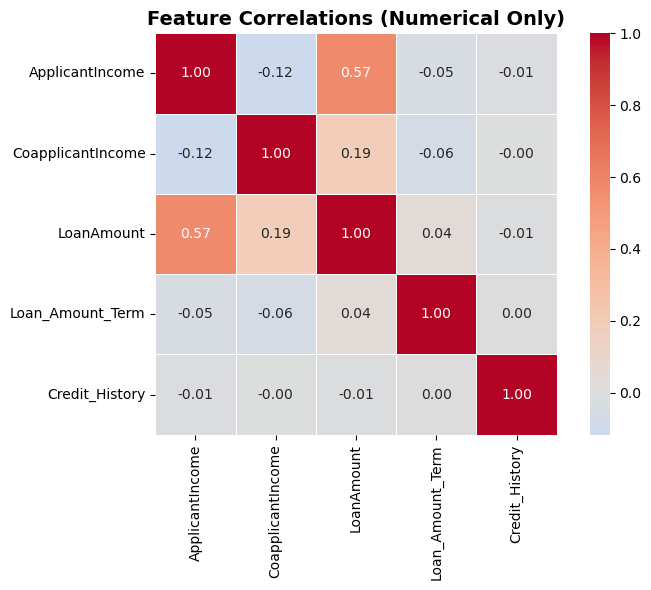

In [13]:
 # Correlation heatmap

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                  'Loan_Amount_Term', 'Credit_History']

corr_matrix= tr_df[numerical_cols].corr()

plt.figure(figsize=(8,6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.2f', linewidths=0.5)

plt.title('Feature Correlations (Numerical Only)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


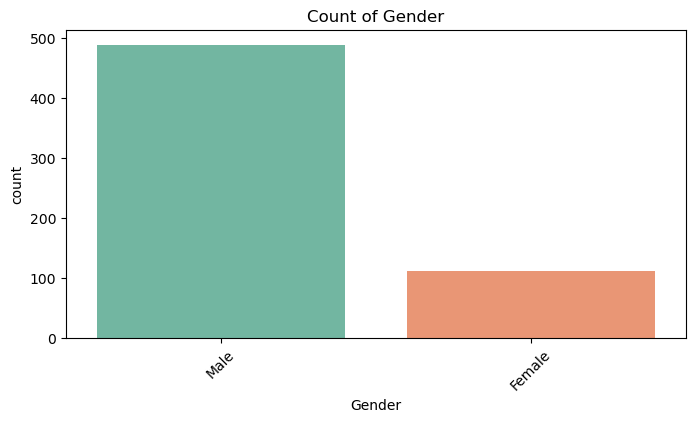

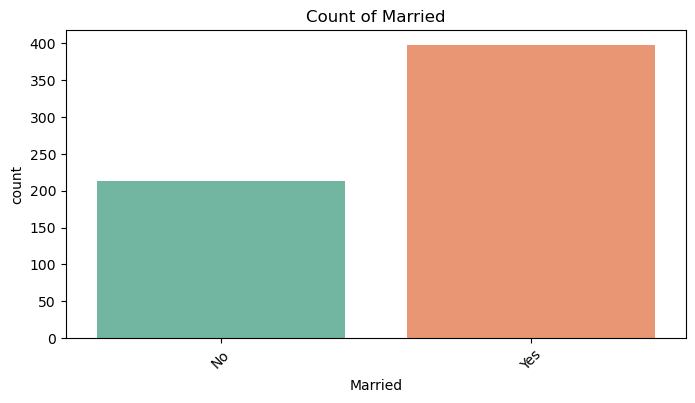

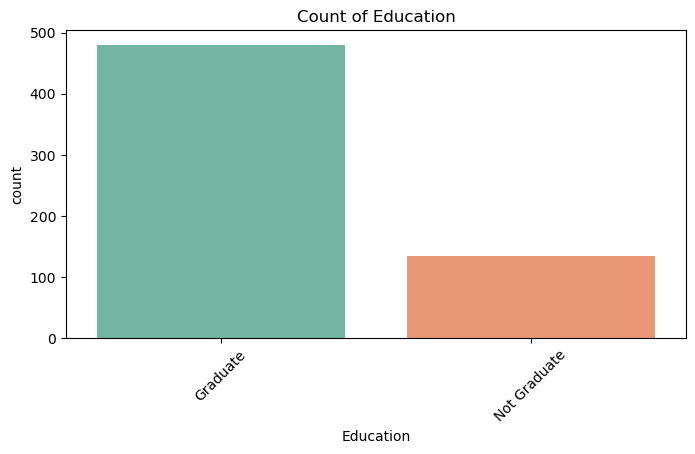

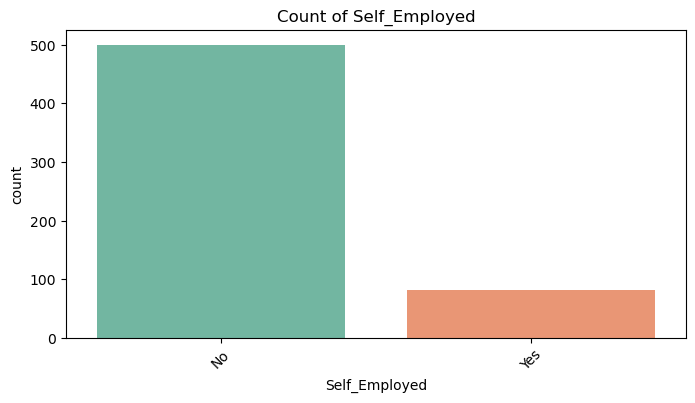

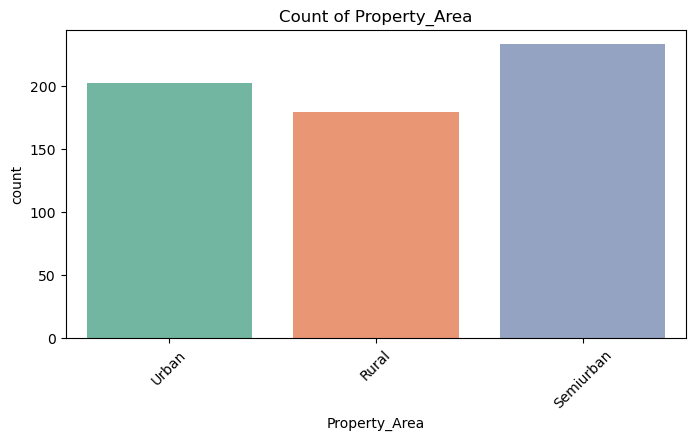

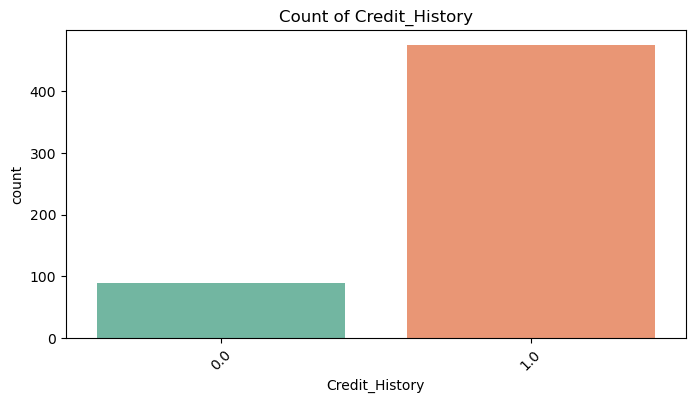

In [14]:
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=tr_df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

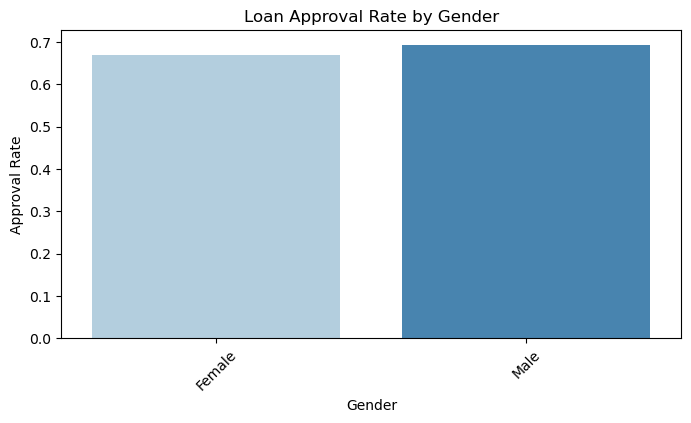

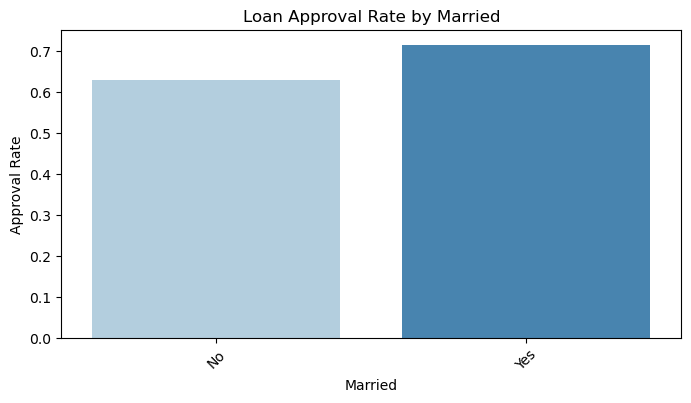

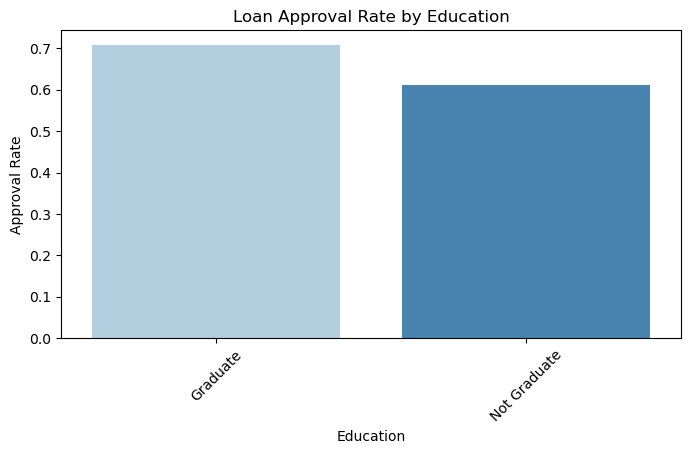

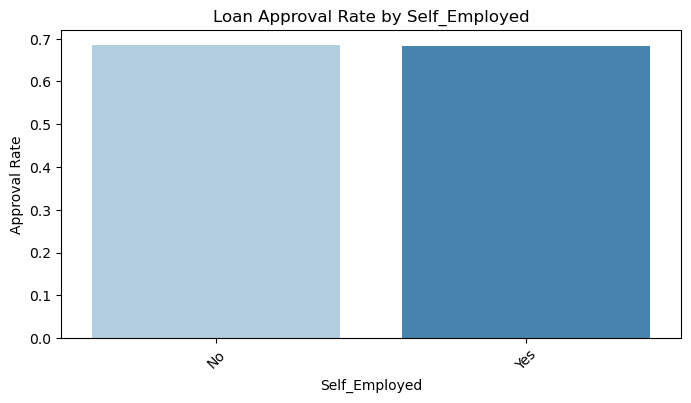

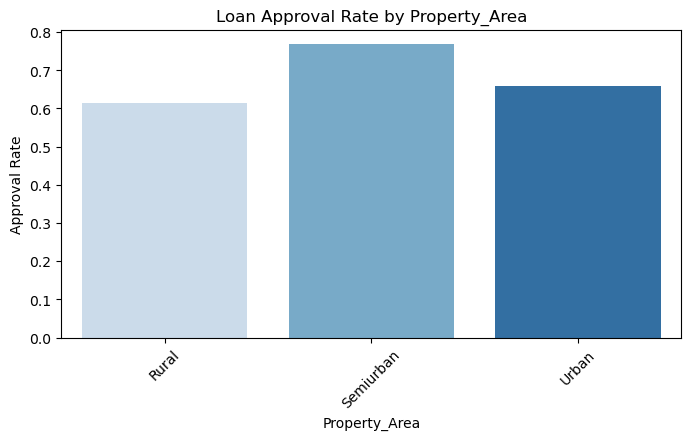

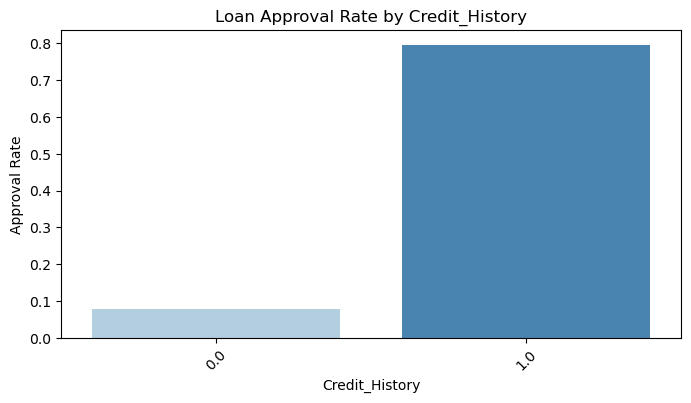

In [15]:
for col in categorical_cols:
    approval_rate = tr_df.groupby(col)['Loan_Status'].apply(lambda x: (x == 'Y').mean())
    plt.figure(figsize=(8,4))
    sns.barplot(x=approval_rate.index, y=approval_rate.values, palette='Blues')
    plt.title(f'Loan Approval Rate by {col}')
    plt.ylabel('Approval Rate')
    plt.xticks(rotation=45)
    plt.show()

## Handling missing values 

In [16]:
tr_df['Gender'].fillna(tr_df['Gender'].mode()[0], inplace=True)
tr_df['Married'].fillna(tr_df['Married'].mode()[0], inplace=True)
tr_df['Dependents'].fillna(tr_df['Dependents'].mode()[0], inplace=True)
tr_df['Self_Employed'].fillna(tr_df['Self_Employed'].mode()[0], inplace=True)


tr_df['LoanAmount'].fillna(tr_df['LoanAmount'].median(), inplace=True)


tr_df['Loan_Amount_Term'].fillna(tr_df['Loan_Amount_Term'].mode()[0], inplace=True)


tr_df['Credit_History'].fillna(tr_df['Credit_History'].mode()[0], inplace=True)

print("\nAfter handling missing values:")
print(tr_df.isnull().sum())


After handling missing values:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [17]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    tr_df[col] = tr_df[col].astype('category')



tr_df_encoded= pd.get_dummies(tr_df, columns=categorical_cols, drop_first=True)

tr_df_encoded['Loan_Status'] = tr_df_encoded['Loan_Status'].map({'Y': 1, 'N': 0})

print("Data Encoding Sucessfully!!")

Data Encoding Sucessfully!!


In [18]:
tr_df_encoded.head()

Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002             5849                0.0       128.0             360.0   
1  LP001003             4583             1508.0       128.0             360.0   
2  LP001005             3000                0.0        66.0             360.0   
3  LP001006             2583             2358.0       120.0             360.0   
4  LP001008             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0             1.0            1         True        False         False   
1             1.0            0         True         True          True   
2             1.0            1         True         True         False   
3             1.0            1         True         True         False   
4             1.0            1         True        False         False   

   Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0         False          False                   False              False   
1         False          False                   False              False   
2         False          False                   False               True   
3         False          False                    True              False   
4         False          False                   False              False   

   Property_Area_Semiurban  Property_Area_Urban  
0                    False                 True  
1                    False                False  
2                    False                 True  
3                    False                 True  
4                    False                 True

## Feature Engineering 

In [19]:
tr_df_encoded['Debt_To_Income']= tr_df_encoded['LoanAmount']/ tr_df_encoded['ApplicantIncome']
tr_df_encoded['Total_Income']= tr_df_encoded['ApplicantIncome']+tr_df_encoded['CoapplicantIncome']



# Log transform skewed features
tr_df_encoded['Log_LoanAmount'] = np.log1p(tr_df_encoded['LoanAmount'])
tr_df_encoded['Log_Income'] = np.log1p(tr_df_encoded['ApplicantIncome'])

## Data Splitting 

In [20]:
tr_df_encoded.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Debt_To_Income',
       'Total_Income', 'Log_LoanAmount', 'Log_Income'],
      dtype='object')

In [21]:
X= tr_df_encoded[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Debt_To_Income',
       'Total_Income', 'Log_LoanAmount', 'Log_Income']].copy()

y= tr_df_encoded['Loan_Status']



X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y   # Preserves class balance in splits
)

## Baseline model- Logistic Regression

In [38]:
numerical_features = [
    'Log_Income', 
    'Log_LoanAmount', 
    'CoapplicantIncome', 
    'Loan_Amount_Term', 
    'Credit_History',
    'Debt_To_Income'  
]
scalar = StandardScaler() 
X_train_scaled= X_train.copy()
X_val_scaled= X_val.copy() 


X_train_scaled[numerical_features]= scalar.fit_transform(X_train[numerical_features])
X_val_scaled[numerical_features]= scalar.transform(X_val[numerical_features])

In [25]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


lr= LogisticRegression(class_weight='balanced',max_iter=1000 ,random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred= lr.predict(X_val_scaled)
y_prob= lr.predict_proba(X_val_scaled)

y_prob_positive = y_prob[:, 1] 



threshold = 0.45
y_pred_tuned = (y_prob_positive > threshold).astype(int)
print("\nThis is the Classification Report: \n")

print("************ Threshold = 0.45 ************")
print(classification_report(y_val, y_pred_tuned, target_names=['Rejected', 'Approved']))


print("This is the ROC AUC Report:\n")
print(roc_auc_score(y_val, y_prob_positive))


This is the Classification Report: 

************ Threshold = 0.45 ************
              precision    recall  f1-score   support

    Rejected       0.84      0.71      0.77        38
    Approved       0.88      0.94      0.91        85

    accuracy                           0.87       123
   macro avg       0.86      0.83      0.84       123
weighted avg       0.87      0.87      0.87       123

This is the ROC AUC Report:

0.8557275541795666


              precision    recall  f1-score   support

Rejected (0)       0.86      0.63      0.73        38
Approved (1)       0.85      0.95      0.90        85

    accuracy                           0.85       123
   macro avg       0.85      0.79      0.81       123
weighted avg       0.85      0.85      0.85       123



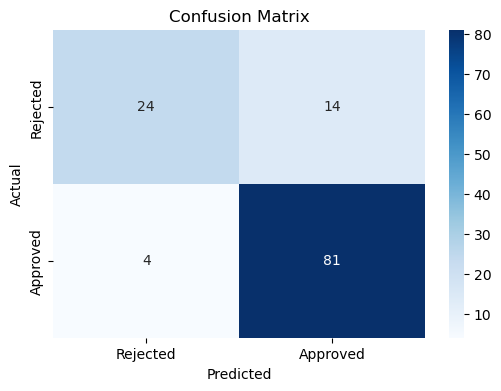

In [28]:
model_rf= RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred_rf= model.predict(X_val_scaled)

print(classification_report(y_val, y_pred_rf, target_names=['Rejected (0)', 'Approved (1)']))


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred_rf),
            annot=True,
            fmt='d',
            cmap='Blues', 
            xticklabels=['Rejected', 'Approved'], 
            yticklabels=['Rejected', 'Approved']
           )


plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [29]:
from sklearn.metrics import make_scorer, f1_score

# Optimize for F1 of "Rejected" (class 0)
f1_rejected_scorer = make_scorer(f1_score, pos_label=0)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]  
}

# Initialize model
rf_tuned = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_tuned,
    param_grid=param_grid,
    cv=5,
    scoring=f1_rejected_scorer,  
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV F1-Score (Rejected):", grid_search.best_score_)

# Use best model
best_rf = grid_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_val_scaled)

print(classification_report(y_val, y_pred_rf_tuned, target_names=['Rejected', 'Approved']))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV F1-Score (Rejected): 0.5669314237322836
              precision    recall  f1-score   support

    Rejected       0.88      0.61      0.72        38
    Approved       0.85      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



              precision    recall  f1-score   support

    Rejected       0.68      0.68      0.68        38
    Approved       0.86      0.86      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.77      0.77       123
weighted avg       0.80      0.80      0.80       123



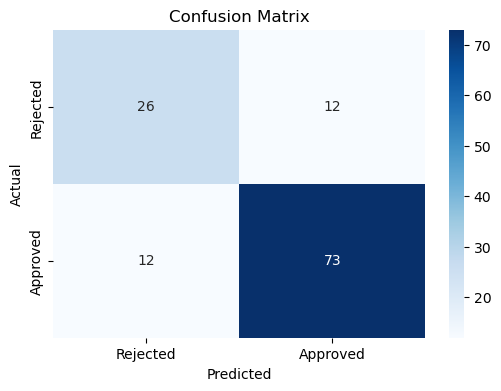

In [30]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # ~0.45
xgb_model = XGBClassifier(
    scale_pos_weight=pos_weight,
    random_state=42,
    learning_rate=0.1,
    n_estimators=100
)

xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_val_scaled)
print(classification_report(y_val, y_pred_xgb, target_names=['Rejected', 'Approved']))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred_xgb),
            annot=True,
            fmt='d',
            cmap='Blues', 
            xticklabels=['Rejected', 'Approved'], 
            yticklabels=['Rejected', 'Approved']
           )


plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();


Fitting 5 folds for each of 24 candidates, totalling 120 fits
              precision    recall  f1-score   support

    Rejected       0.96      0.61      0.74        38
    Approved       0.85      0.99      0.91        85

    accuracy                           0.87       123
   macro avg       0.90      0.80      0.83       123
weighted avg       0.88      0.87      0.86       123



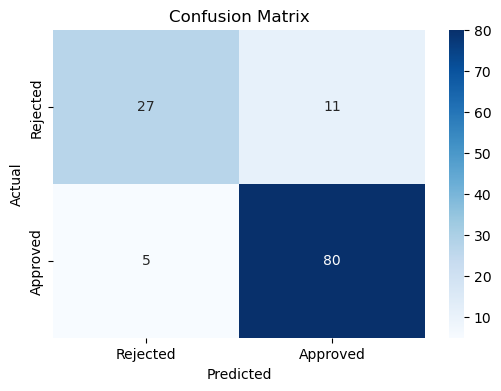

In [31]:

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
y_pred_xgb_tuned = best_model.predict(X_val_scaled)

print(classification_report(y_val, y_pred_xgb_tuned, target_names=['Rejected', 'Approved']))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred_tuned),
            annot=True,
            fmt='d',
            cmap='Blues', 
            xticklabels=['Rejected', 'Approved'], 
            yticklabels=['Rejected', 'Approved']
           )


plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();


In [32]:

# Create comparison DataFrame
model_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression (Baseline)',
        'Random Forest (Default)',
        'Random Forest (Tuned)',
        'XGBoost (Default)',
        'XGBoost (Tuned)'
    ],
    'F1_Rejected': [0.77, 0.73, 0.72, 0.68, 0.74],
    'Recall_Rejected': [0.71, 0.63, 0.61, 0.68, 0.61],
    'Precision_Rejected': [0.84, 0.86, 0.88, 0.68, 0.96],
    'Accuracy': [0.87, 0.85, 0.85, 0.80, 0.87],
    'Notes': [
        'Scaled + Threshold=0.45',
        'Default hyperparameters',
        'GridSearchCV tuned',
        'Unscaled, scale_pos_weight',
        'GridSearchCV tuned'
    ]
})

print(model_comparison)

                            Model  F1_Rejected  Recall_Rejected  \
0  Logistic Regression (Baseline)         0.77             0.71   
1         Random Forest (Default)         0.73             0.63   
2           Random Forest (Tuned)         0.72             0.61   
3               XGBoost (Default)         0.68             0.68   
4                 XGBoost (Tuned)         0.74             0.61   

   Precision_Rejected  Accuracy                       Notes  
0                0.84      0.87     Scaled + Threshold=0.45  
1                0.86      0.85     Default hyperparameters  
2                0.88      0.85          GridSearchCV tuned  
3                0.68      0.80  Unscaled, scale_pos_weight  
4                0.96      0.87          GridSearchCV tuned  


In [33]:
model_comparison.head()

Model  F1_Rejected  Recall_Rejected  \
0  Logistic Regression (Baseline)         0.77             0.71   
1         Random Forest (Default)         0.73             0.63   
2           Random Forest (Tuned)         0.72             0.61   
3               XGBoost (Default)         0.68             0.68   
4                 XGBoost (Tuned)         0.74             0.61   

   Precision_Rejected  Accuracy                       Notes  
0                0.84      0.87     Scaled + Threshold=0.45  
1                0.86      0.85     Default hyperparameters  
2                0.88      0.85          GridSearchCV tuned  
3                0.68      0.80  Unscaled, scale_pos_weight  
4                0.96      0.87          GridSearchCV tuned

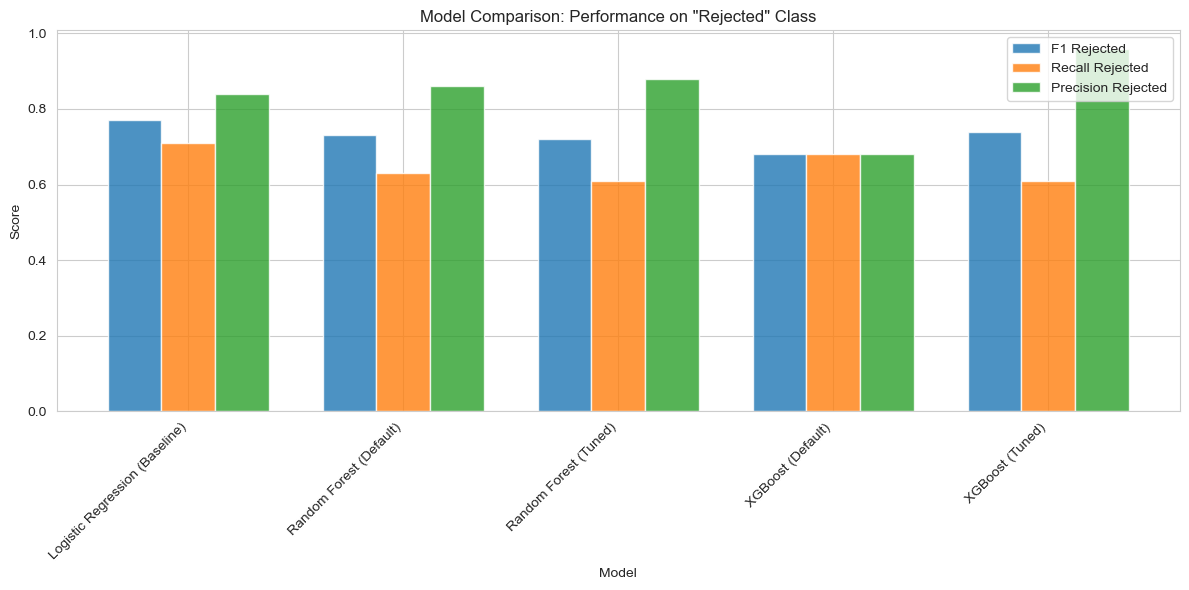

In [34]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot F1, Recall, Precision for Rejected class
metrics = ['F1_Rejected', 'Recall_Rejected', 'Precision_Rejected']
x = range(len(model_comparison['Model']))

for i, metric in enumerate(metrics):
    plt.bar([x_tick + i*0.25 for x_tick in x], model_comparison[metric], 
            width=0.25, label=metric.replace('_', ' '), alpha=0.8)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison: Performance on "Rejected" Class')
plt.xticks([x_tick + 0.25 for x_tick in x], model_comparison['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
model_comparison_sorted = model_comparison.sort_values('F1_Rejected', ascending=False).reset_index(drop=True)

# Save to CSV
model_comparison_sorted.to_csv('../reports/model_comparison.csv', index=False)

# Display in notebook
model_comparison_sorted.style.background_gradient(cmap='Blues', subset=['F1_Rejected', 'Recall_Rejected', 'Precision_Rejected'])

## Final Model: Logistic Regression with Threshold Tuning

**Performance:**
- F1-Score (Rejected): 0.77
- Recall (Rejected): 0.71 (catches 71% of risky loans)
- Precision (Rejected): 0.84 (only 16% false rejections)

**Why This Model?**
1. Outperformed ensemble methods (RF F1=0.71-0.72, XGBoost F1=0.68-0.74)
2. Fully interpretable — critical for banking compliance
3. No synthetic data risk (unlike SMOTE)
4. Lightweight and fast to deploy

**Key Engineering Steps:**
1. Log-transformed skewed features (`Income`, `LoanAmount`)
2. Standardized all numerical features
3. Tuned decision threshold to 0.45 to optimize F1 for minority class



In [40]:
# Save artifacts (optional but professional)
import joblib
joblib.dump(scalar, '../models/scalar.pkl')
joblib.dump(lr, '../models/lr.pkl')

print("************ Artifacts Saved ***********")

************ Artifacts Saved ***********
